# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:


import numpy as np # linear algebra
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:/Users/jssri/Downloads/dogvscat/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.0.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.1.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.100.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.1000.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10000.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10001.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10002.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10003.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10004.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10005.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10006.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10007.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10008.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10009.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.1001.jpg
C:/Users/jssri/Downloads/dogvscat/train\Cat\cat.10010.jpg
C:/Users/jssri/Downloads/dogv

In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from torchvision.datasets import ImageFolder
from resizeimage import resizeimage
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

C:\Users\jssri\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Define a function to convert an image to grayscale
def convert_to_grayscale(image):
    return image.convert('L')  # 'L' mode represents grayscale images


In [4]:
# importing images using torchvision
dataset = ImageFolder("C:/Users/jssri/Downloads/dogvscat/train")

# creating labels dataframe
imgs, labels = zip(*dataset.imgs)
imgs = list(imgs)
labels = list(labels)
labels_df = pd.DataFrame({'image': imgs, 'label':labels})
labels_df

,image,label
0,C:/Users/jssri/Downloads/dogvscat/train\Cat\ca...,0
1,C:/Users/jssri/Downloads/dogvscat/train\Cat\ca...,0
2,C:/Users/jssri/Downloads/dogvscat/train\Cat\ca...,0
3,C:/Users/jssri/Downloads/dogvscat/train\Cat\ca...,0
4,C:/Users/jssri/Downloads/dogvscat/train\Cat\ca...,0
...,...,...
23645,C:/Users/jssri/Downloads/dogvscat/train\Dog\do...,1
23646,C:/Users/jssri/Downloads/dogvscat/train\Dog\do...,1
23647,C:/Users/jssri/Downloads/dogvscat/train\Dog\do...,1
23648,C:/Users/jssri/Downloads/dogvscat/train\Dog\do...,1


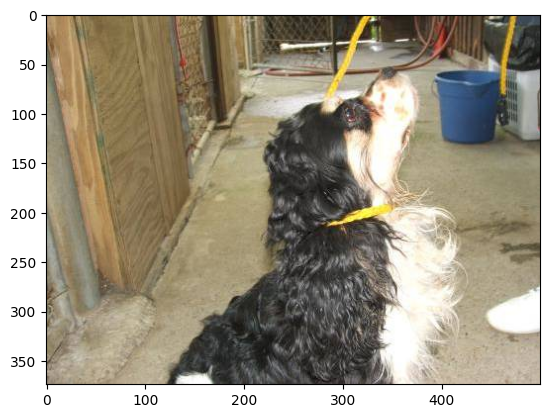

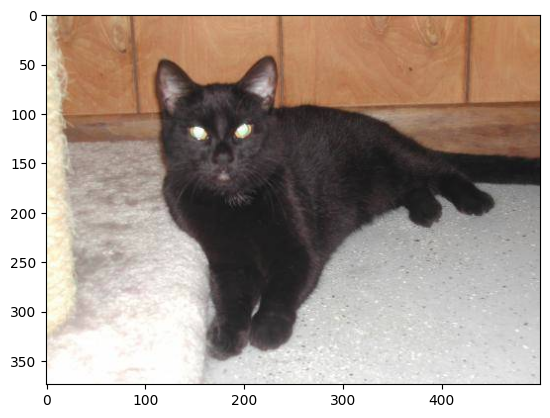

In [35]:
def get_image(path):
    img = Image.open(path)
    return np.array(img)

# showing a dog image
dog_row = labels_df[labels_df.label == 1].reset_index().image[23]
plt.imshow(get_image(dog_row))
plt.show()

# showing a cat image
cat_row = labels_df[labels_df.label == 0].reset_index().image[79]
plt.imshow(get_image(cat_row))
plt.show()

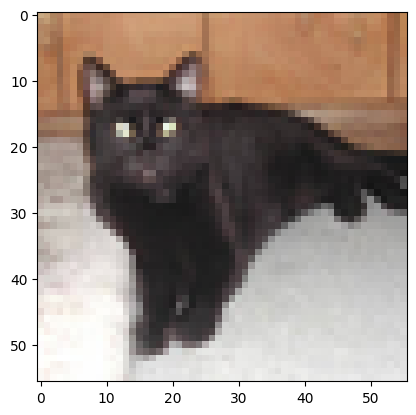

In [36]:
# image manupulation
img = Image.open(cat_row)
img = resizeimage.resize_cover(img, [56, 56])
plt.imshow(np.array(img), cmap='gray')
plt.show()

In [12]:
# Creating a list of image file paths
file_path = [os.path.join(dirname, filename) for dirname, _, filenames in os.walk('C:/Users/jssri/Downloads/dogvscat/train') for filename in filenames]

# Getting file names from the file path
file_names = [os.path.basename(path) for path in file_path]

# Add label to images
# dog = 1, cat = 0
labels = []
cat_count = 0
dog_count = 0

for image in file_names:
    if image[0:3] == 'cat':
        label = 0
        cat_count += 1
    else:
        label = 1
    labels.append(label)

print('Number of cat images:', cat_count)
print('Number of dog images:', len(file_names) - cat_count)


Number of cat images: 11823
Number of dog images: 11827


In [13]:
# Split into cat and dog images
cat_images = file_names[:12500]
cat_path = file_path[:12500]

dog_images = file_names[12500:]
dog_path = file_path[12500:]


In [14]:
# Preprocess the data
features = []
image_size = (50, 50)

def process_images(file_path):
    new_features = []
    # Process train images
    for path in file_path:
        image_read = cv2.imread(path)
        # Resize the image
        image_resized = cv2.resize(image_read, image_size)
        # Convert to grayscale image
        image_bw = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        image_normalized = image_bw / 255.0
        # Flatten the image to use as a feature vector
        img = image_normalized.flatten()
        new_features.append(img)

    return new_features

features = process_images(file_path)

In [15]:
# Convert the lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Shuffling image order
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
labels = labels[indices]

n_samples = 2000

In [16]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(features[:n_samples], labels[:n_samples], train_size=0.8, test_size=0.2, shuffle=True, random_state=42)

print('Training dataset:', X_train.shape, Y_train.shape)
print('Testing dataset:', X_test.shape, Y_test.shape)

Training dataset: (1600, 2500) (1600,)
Testing dataset: (400, 2500) (400,)


In [17]:
# Training the SVM
train_pred = {}
test_pred = {}
kernels = ('linear', 'poly', 'rbf', 'sigmoid')

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1)

    # Train the SVM
    svm_model.fit(X_train[:n_samples], Y_train[:n_samples])

    # Make predictions on the test set
    train_pred[kernel] = svm_model.predict(X_train[:n_samples])
    test_pred[kernel] = svm_model.predict(X_test[:n_samples])


In [21]:
# Evaluate the model
def evaluate(pred1, pred2):
    accuracy = accuracy_score(pred1, pred2)
    precision = precision_score(pred1, pred2)
    recall = recall_score(pred1, pred2)
    f1 = f1_score(pred1, pred2)
    

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    

    return accuracy

acc = []
test_acc = []

In [22]:
for kernel in kernels:
    print(f'SVM with {kernel} Kernel:\n')
    print('Training Metrics: \n')
    acc.append(evaluate(Y_train[:n_samples], train_pred[kernel]))
    print('Testing Metrics:\n')
    test_acc.append(evaluate(Y_test[:n_samples], test_pred[kernel]))
    print('\n\n')

SVM with linear Kernel:

Training Metrics: 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Testing Metrics:

Accuracy: 0.5375
Precision: 0.5340909090909091
Recall: 0.47715736040609136
F1 Score: 0.5040214477211796



SVM with poly Kernel:

Training Metrics: 

Accuracy: 0.99875
Precision: 0.9975186104218362
Recall: 1.0
F1 Score: 0.9987577639751554
Testing Metrics:

Accuracy: 0.6025
Precision: 0.601063829787234
Recall: 0.5736040609137056
F1 Score: 0.5870129870129871



SVM with rbf Kernel:

Training Metrics: 

Accuracy: 0.88375
Precision: 0.8661137440758294
Recall: 0.9092039800995025
F1 Score: 0.8871359223300971
Testing Metrics:

Accuracy: 0.6225
Precision: 0.6138613861386139
Recall: 0.6294416243654822
F1 Score: 0.6215538847117794



SVM with sigmoid Kernel:

Training Metrics: 

Accuracy: 0.505625
Precision: 0.5078597339782346
Recall: 0.5223880597014925
F1 Score: 0.5150214592274678
Testing Metrics:

Accuracy: 0.54
Precision: 0.5305164319248826
Recall: 0.5736040609137056
F1 Score: